### For this project, I used the obesity dataset from Kaggle: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

In [1]:
import pandas as pd

# reading in the obesity dataset
obesity = pd.read_csv("~/obesity.csv")
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Step 1: Data Cleaning

In [2]:
obesity.shape # 2,111 observations and 17 columns

(2111, 17)

In [3]:
# renaming the columns for convenience
obesity.columns = ['gender', 'age', 'height', 'weight', 'overweight_family', 
                   'freq_high_calorie_food', 'freq_vegetable', 'num_main_meals', 'consume_food_btwn_meals',
                  'smoke', 'daily_h2o_consumption', 'calorie_monitoring', 'freq_physical_activity', 
                  'time_used_technology', 'freq_alcohol_consumption', 'mode_transportation', 'obesity_level']

In [4]:
obesity.head() # checking first few rows of the dataset

,gender,age,height,weight,overweight_family,freq_high_calorie_food,freq_vegetable,num_main_meals,consume_food_btwn_meals,smoke,daily_h2o_consumption,calorie_monitoring,freq_physical_activity,time_used_technology,freq_alcohol_consumption,mode_transportation,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# checking dataset for missing values
obesity.isnull().sum()
# There are no missing values

gender                      0
age                         0
height                      0
weight                      0
overweight_family           0
freq_high_calorie_food      0
freq_vegetable              0
num_main_meals              0
consume_food_btwn_meals     0
smoke                       0
daily_h2o_consumption       0
calorie_monitoring          0
freq_physical_activity      0
time_used_technology        0
freq_alcohol_consumption    0
mode_transportation         0
obesity_level               0
dtype: int64

In [6]:
# checking all of the levels in the obesity_level variable
obesity['obesity_level'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [7]:
# OBESITY LEVEL VARIABLE
# Here, I define a function to map the levels "Normal Weight" and "Insufficient Weight" to 0
# and the rest of the levels are mapped to 1
def map_obesity_level(obesity_level):
    if obesity_level in ['Normal_Weight', 'Insufficient_Weight']:
        return 0
    else:
        return 1

# Applying the map_obesity_level function to the 'obesity_level' 
# column and create a new column called 'obesity_binary'
obesity['obesity_binary'] = obesity['obesity_level'].apply(map_obesity_level)

In [8]:
# OVERWEIGHT FAMILY VARIABLE
# Mapping 'yes' to 1 and 'no' to 0
obesity['overweight_family_binary'] = obesity['overweight_family'].map({'yes': 1, 'no': 0})
obesity

,gender,age,height,weight,overweight_family,freq_high_calorie_food,freq_vegetable,num_main_meals,consume_food_btwn_meals,smoke,daily_h2o_consumption,calorie_monitoring,freq_physical_activity,time_used_technology,freq_alcohol_consumption,mode_transportation,obesity_level,obesity_binary,overweight_family_binary
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,0,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,0,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1,1


In [9]:
# FREQUENCY HIGH CALORIE FOOD
# Mapping 'yes' to 1 and 'no' to 0
obesity['binary_freq_high_calorie_food'] = obesity['freq_high_calorie_food'].map({'yes': 1, 'no': 0})
obesity

,gender,age,height,weight,overweight_family,freq_high_calorie_food,freq_vegetable,num_main_meals,consume_food_btwn_meals,smoke,daily_h2o_consumption,calorie_monitoring,freq_physical_activity,time_used_technology,freq_alcohol_consumption,mode_transportation,obesity_level,obesity_binary,overweight_family_binary,binary_freq_high_calorie_food
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,0,1,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,1,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,0,1,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1,0,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1


In [10]:
# CALORIE MONITORING
# Mapping 'yes' to 1 and 'no' to 0
obesity['binary_calorie_monitoring'] = obesity['calorie_monitoring'].map({'yes': 1, 'no': 0})
obesity

,gender,age,height,weight,overweight_family,freq_high_calorie_food,freq_vegetable,num_main_meals,consume_food_btwn_meals,smoke,...,calorie_monitoring,freq_physical_activity,time_used_technology,freq_alcohol_consumption,mode_transportation,obesity_level,obesity_binary,overweight_family_binary,binary_freq_high_calorie_food,binary_calorie_monitoring
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,0,1,0,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,1,0,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,0,1,0,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1,0,0,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0


In [11]:
# SMOKE
# Mapping 'yes' to 1 and 'no' to 0
obesity['binary_smoke'] = obesity['smoke'].map({'yes': 1, 'no': 0})
obesity

,gender,age,height,weight,overweight_family,freq_high_calorie_food,freq_vegetable,num_main_meals,consume_food_btwn_meals,smoke,...,freq_physical_activity,time_used_technology,freq_alcohol_consumption,mode_transportation,obesity_level,obesity_binary,overweight_family_binary,binary_freq_high_calorie_food,binary_calorie_monitoring,binary_smoke
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,0.000000,1.000000,no,Public_Transportation,Normal_Weight,0,1,0,0,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,1,0,1,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,0,1,0,0,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1,0,0,0,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0,0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0,0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0,0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1,1,1,0,0


In [12]:
# checking the levels in the consume_food_btwn_meals variable
obesity['consume_food_btwn_meals'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [13]:
# CONSUME FOOD BETWEEN MEALS
# Defining a function to map the categories 'sometimes', 'frequently', and 'always' to 1
# and everything else to 0
def map_consume_btwn_meals(consumption):
    if consumption in ['Sometimes', 'Frequently', 'Always']:
        return 1
    else:
        return 0

obesity['binary_consume_food_btwn_meals'] = obesity['consume_food_btwn_meals'].apply(map_consume_btwn_meals)

In [14]:
# checking the levels in the freq_alcohol_consumption variable
obesity['freq_alcohol_consumption'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [15]:
# FREQUENT ALCOHOL CONSUMPTION
# Defining a function to map the categories 'sometimes', 'frequently', and 'always' to 1
# and everything else to 0
def map_consume_alcohol(consume_alcohol):
    if consume_alcohol in ['Sometimes', 'Frequently', 'Always']:
        return 1
    else:
        return 0

obesity['binary_freq_alcohol_consumption'] = obesity['freq_alcohol_consumption'].apply(map_consume_alcohol)

In [16]:
obesity.columns # these are now all of the variables in the dataset

Index(['gender', 'age', 'height', 'weight', 'overweight_family',
       'freq_high_calorie_food', 'freq_vegetable', 'num_main_meals',
       'consume_food_btwn_meals', 'smoke', 'daily_h2o_consumption',
       'calorie_monitoring', 'freq_physical_activity', 'time_used_technology',
       'freq_alcohol_consumption', 'mode_transportation', 'obesity_level',
       'obesity_binary', 'overweight_family_binary',
       'binary_freq_high_calorie_food', 'binary_calorie_monitoring',
       'binary_smoke', 'binary_consume_food_btwn_meals',
       'binary_freq_alcohol_consumption'],
      dtype='object')

In [17]:
obesity['is_female'] = (obesity['gender'].str.lower() == 'female').astype(int)
obesity

,gender,age,height,weight,overweight_family,freq_high_calorie_food,freq_vegetable,num_main_meals,consume_food_btwn_meals,smoke,...,mode_transportation,obesity_level,obesity_binary,overweight_family_binary,binary_freq_high_calorie_food,binary_calorie_monitoring,binary_smoke,binary_consume_food_btwn_meals,binary_freq_alcohol_consumption,is_female
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,0,1,0,0,0,1,0,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,Public_Transportation,Normal_Weight,0,1,0,1,1,1,1,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,0,1,0,0,0,1,1,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,Walking,Overweight_Level_I,1,0,0,0,0,1,1,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,Public_Transportation,Overweight_Level_II,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,1,1,1,0,0,1,1,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,1,1,1,0,0,1,1,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,1,1,1,0,0,1,1,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,1,1,1,0,0,1,1,1


In [18]:
# dropping the mode of transportation variable
obesity.drop(columns='mode_transportation', inplace=True)

## Step 2: Data Exploration

# histogram of weight and color based on normal weight, underweight, or over weight


# make a correlation matrix

# find-p-values to see which variables are the most statistically significant

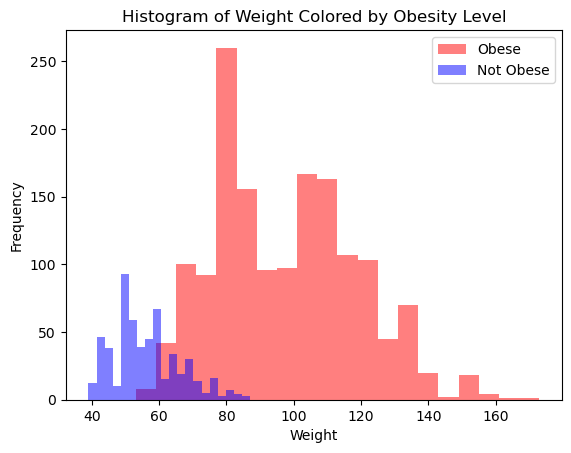

In [19]:
import matplotlib.pyplot as plt

weight_obese = obesity.loc[obesity['obesity_binary'] == 1, 'weight']
weight_not_obese = obesity.loc[obesity['obesity_binary'] == 0, 'weight']

plt.hist(weight_obese, color='red', alpha=0.5, label='Obese', bins=20)
plt.hist(weight_not_obese, color='blue', alpha=0.5, label='Not Obese', bins=20)

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight Colored by Obesity Level')

plt.legend()

plt.show()

Inspecting the Histogram of Weight Colored by Obesity Level, I notice that there is a little bit of overlap between the "obsese" and "not obese" categories, but they are decently separable.

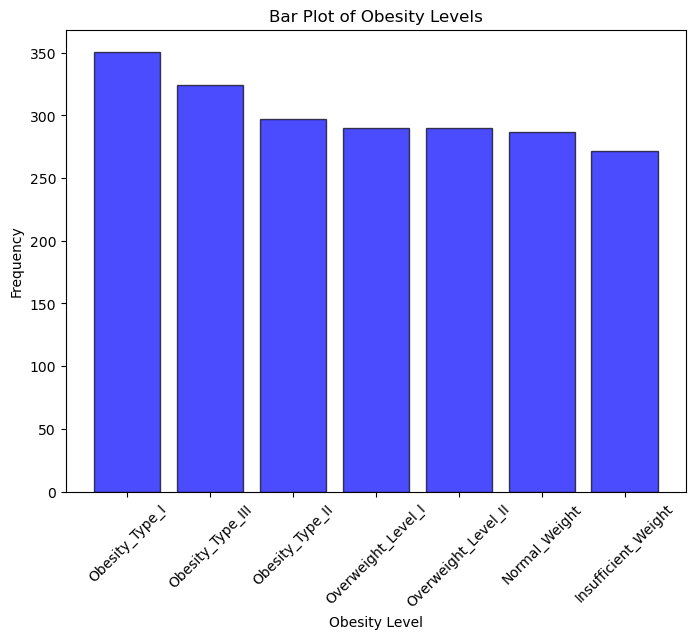

In [35]:
# Histogram of obesity_level variable
obesity_val_counts = obesity['obesity_level'].value_counts()

plt.figure(figsize=(8, 6))

# creating bar plot
plt.bar(obesity_counts.index, obesity_val_counts.values, color='blue', edgecolor='black', alpha=0.7)

# adding title
plt.title('Bar Plot of Obesity Levels')

# adding x label
plt.xlabel('Obesity Level')

# adding y label
plt.ylabel('Frequency')

# rotating x ticks
plt.xticks(rotation=45)

# Show plot
plt.show()

The bar plot of obesity level reveals that the frequencies of each obesity level are not too different from each other.

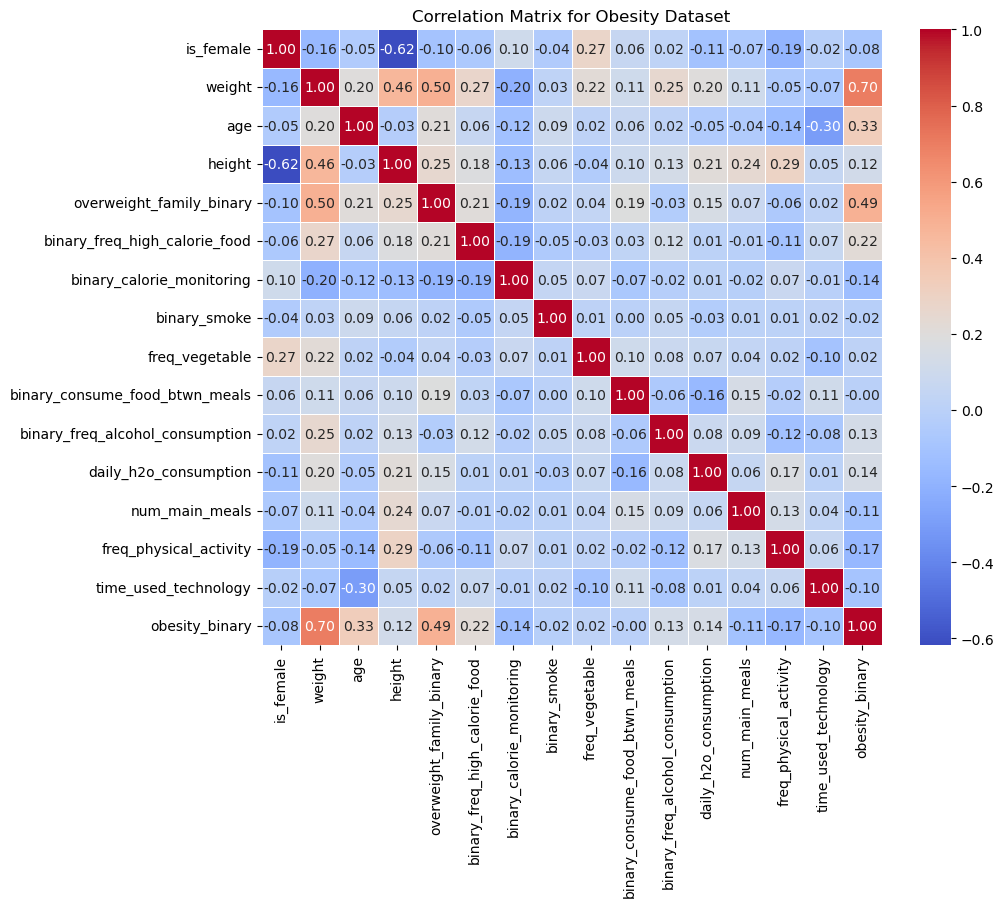

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = obesity[['is_female','weight','age', 'height','overweight_family_binary', 'binary_freq_high_calorie_food',
             'binary_calorie_monitoring', 'binary_smoke', 'freq_vegetable',
             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
             'daily_h2o_consumption','num_main_meals', 'freq_physical_activity', 'time_used_technology']]
y = obesity['obesity_binary'] 


data = pd.concat([X, y], axis=1)


correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Obesity Dataset')
plt.show()

## Step 3: Logistic Regression Model

In [22]:
# full model: 15 predictors

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

X = obesity[['is_female','weight','age', 'height','overweight_family_binary', 'binary_freq_high_calorie_food',
             'binary_calorie_monitoring', 'binary_smoke', 'freq_vegetable',
             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
             'daily_h2o_consumption','num_main_meals', 'freq_physical_activity', 'time_used_technology']]
y = obesity['obesity_binary'] 

# 20% of the data goes into training set and rest for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

# initialize logistic regression model
model = LogisticRegression(max_iter = 1000)

# training the model
model.fit(X_train, y_train)

# predict on the testing data
y_pred = model.predict(X_test)

# Find the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix for precision, recall
# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9550827423167849
Confusion Matrix:
[[ 89  13]
 [  6 315]]
Precision: 0.9603658536585366
Recall: 0.9813084112149533
F1 Score: 0.9707241910631741


In [23]:
# Now, using stats models, I can find the pseudo r-squared and p-values 
# to see which variables are most statistically significant.
import statsmodels.api as sm
import numpy as np

X = obesity[['is_female','weight','age', 'height','overweight_family_binary', 'binary_freq_high_calorie_food',
             'binary_calorie_monitoring', 'binary_smoke', 'freq_vegetable',
             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
             'daily_h2o_consumption','num_main_meals', 'freq_physical_activity', 'time_used_technology']]
y = obesity['obesity_binary'] 

X_with_const = sm.add_constant(X)

# fitting the model
logit_model = sm.Logit(y, X_with_const)

# getting model results
logit_result = logit_model.fit()

# printing summary
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.010834
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:         obesity_binary   No. Observations:                 2111
Model:                          Logit   Df Residuals:                     2095
Method:                           MLE   Df Model:                           15
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.9813
Time:                        18:07:32   Log-Likelihood:                -22.870
converged:                       True   LL-Null:                       -1220.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             178.3995     35.808      4.982 

### Suppose we did not have access to weight as a predictor, a.k.a we did not have data on weight. Would we still be able to predict whether or not someone is obese just by looking at the other features?

In [24]:
# Now we can try Logistic Regression without weight as a feature (14 predictors now)

X = obesity[['is_female','age', 'height','overweight_family_binary', 'binary_freq_high_calorie_food',
             'binary_calorie_monitoring', 'binary_smoke', 'freq_vegetable',
             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
             'daily_h2o_consumption','num_main_meals', 'freq_physical_activity', 'time_used_technology']]
y = obesity['obesity_binary'] 

# 20% of the data goes into training set and rest for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

# initialize logistic regression model
model = LogisticRegression(max_iter = 1000)

# training the model
model.fit(X_train, y_train)

# predict on the testing data
y_pred = model.predict(X_test)

# Find the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# confusion matrix for precision, recall

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#final logistic model coefficients, p-values. correlation matrix

Accuracy: 0.8534278959810875
Confusion Matrix:
[[ 57  45]
 [ 17 304]]
Precision: 0.8710601719197708
Recall: 0.9470404984423676
F1 Score: 0.9074626865671641


In [25]:
X = obesity[['is_female','age','height','overweight_family_binary', 'binary_freq_high_calorie_food',
             'binary_calorie_monitoring', 'binary_smoke', 'freq_vegetable',
             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
             'daily_h2o_consumption','num_main_meals', 'freq_physical_activity', 'time_used_technology']]
y = obesity['obesity_binary'] 

# Add a constant to the features (X) to account for the intercept term
X_with_const = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X_with_const)

# Get the fitted model results
logit_result = logit_model.fit()

# Print model summary containing coefficients and p-values
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.382022
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         obesity_binary   No. Observations:                 2111
Model:                          Logit   Df Residuals:                     2096
Method:                           MLE   Df Model:                           14
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.3391
Time:                        18:07:32   Log-Likelihood:                -806.45
converged:                       True   LL-Null:                       -1220.2
Covariance Type:            nonrobust   LLR p-value:                1.439e-167
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -4.4150      1.620     -2.725  

## Step 4: Decision Tree Classifier Model

In [26]:
# Full model: 15 predictors

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import pandas as pd


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(obesity[['is_female','weight','age', 'height','overweight_family_binary', 
                                                             'binary_freq_high_calorie_food', 'freq_vegetable',
                                                             'binary_calorie_monitoring', 'binary_smoke', 
                                                             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
                                                             'daily_h2o_consumption','num_main_meals', 
                                                             'freq_physical_activity', 'time_used_technology']], 
                                                    obesity['obesity_binary'], test_size=0.2, random_state=42)

# Initialize decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict on the testing data
y_pred = tree.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)
print("MSE:", mse)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9716312056737588
MSE: 0.028368794326241134
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       118
           1       0.98      0.98      0.98       305

    accuracy                           0.97       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.97      0.97       423



In [27]:
# Now trying decision tree without the weight variable (14 predictors now)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(obesity[['is_female','age', 'height','overweight_family_binary', 
                                                             'binary_freq_high_calorie_food', 'freq_vegetable',
                                                             'binary_calorie_monitoring', 'binary_smoke', 
                                                             'binary_consume_food_btwn_meals', 'binary_freq_alcohol_consumption', 
                                                             'daily_h2o_consumption','num_main_meals', 
                                                             'freq_physical_activity', 'time_used_technology']], 
                                                    obesity['obesity_binary'], test_size=0.2, random_state=42)

# Initialize decision tree classifier
tree2 = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
tree2.fit(X_train, y_train)

# Predict on the testing data
y_pred = tree2.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)
print("MSE:", mse)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.851063829787234
MSE: 0.14893617021276595
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       118
           1       0.89      0.90      0.90       305

    accuracy                           0.85       423
   macro avg       0.82      0.81      0.81       423
weighted avg       0.85      0.85      0.85       423

